[View in Colaboratory](https://colab.research.google.com/github/cheonbok94/DeepLearningLecture/blob/master/machine_learning/(ANS)Linear_regression.ipynb)

# Machine Learning Lecture Lab 1 

### Copyright (C) 2018  Cheonbok Park <cb_park@korea.ac.kr> 

In [101]:
import numpy as np   # Python 수학 연산 관련 라이브러리 
import matplotlib.pyplot as plt # Python 시각화 툴 

from sklearn.linear_model import LinearRegression # 몇몇 Machine Learning algorithms 이 정의된 sklearn에서 Linear regression model 가져오기  
from mpl_toolkits.mplot3d import axes3d # Cost function 함수 보여주기 위해서

%matplotlib inline  # ipython notebook 상에서 matplotlib의 plot을 확인할 수 있도록 해줌. 


UsageError: unrecognized arguments: # ipython notebook 상에서 matplotlib의 plot을 확인할 수 있도록 해줌.


## Numpy Tutorial 

In [29]:
list1 = [1, 2, 3, 4]
a = np.array(list) # np.array에 list 를 인자를 주면 해당 list numpy array 변환해 줍니다. 
print(a.shape) # (4, )
 
b = np.array([[1,2,3],[4,5,6]])
print(b.shape) # (2, 3) numpy array shape 하면 해당 shape 을 뱉음. 
print(b[0,0])  # 1    

(4,)
(2, 3)
1


In [102]:
nums = list(range(5))     # range is a built-in function that creates a list of integers
print(nums)               # Prints "[0, 1, 2, 3, 4]"
print(nums[2:4])          # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"
print(nums[2:])           # Get a slice from index 2 to the end; prints "[2, 3, 4]"
print(nums[:2])           # Get a slice from the start to index 2 (exclusive); prints "[0, 1]"
print(nums[:])            # Get a slice of the whole list; prints "[0, 1, 2, 3, 4]"
print(nums[:-1])          # Slice indices can be negative; prints "[0, 1, 2, 3]"
nums[2:4] = [8, 9]        # Assign a new sublist to a slice
print(nums)               # Prints "[0, 1, 8, 9, 4]"

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


In [31]:
a = np.zeros((2,2))   # Create an array of all zeros
print(a)              # Prints "[[ 0.  0.]
                      #          [ 0.  0.]]"

b = np.ones((1,2))    # Create an array of all ones
print(b)              # Prints "[[ 1.  1.]]"

c = np.full((2,2), 7)  # Create a constant array
print(c)               # Prints "[[ 7.  7.]
                       #          [ 7.  7.]]"

d = np.eye(2)         # Create a 2x2 identity matrix
print(d)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

e = np.random.random((2,2))  # Create an array filled with random values
print(e)                     # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"

[[0. 0.]
 [0. 0.]]
[[1. 1.]]
[[7 7]
 [7 7]]
[[1. 0.]
 [0. 1.]]
[[0.83042618 0.58721596]
 [0.78204648 0.84258393]]


In [32]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]

# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   # Prints "77"

2
77


In [103]:

x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]


In [104]:
np.sum(x) # numpy sum 1 + 2 + 3 +4

10.0

In [106]:
np.sum(x,1) # row sum 1 +2 -> 3 // 3+4 -> 7  ==> [3,7]

array([3., 7.])

In [107]:
x.dot(y) # XY => (n*m) x (m*k)  => (n*k)

array([[19., 22.],
       [43., 50.]])

In [108]:
x*2 # 모든 원소에 2를 곱함. 

array([[2., 4.],
       [6., 8.]])

In [109]:

x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]


## Linear Regression

In [0]:
# 데이터 생성
x1 =  np.random.uniform(0,10,100) 
y =  x1*0.5+ np.random.normal(0,1,100) -0.1
y = y.reshape(y.size,1)

In [0]:
# X데이터를 생성해 봅니다. 100* 2 matrix [column1 : x0 , column2 : x1 ]
X = np.c_[np.ones(x1.shape[0]),x1] # Basis function 생성 x0는 항상? -> 1 //  x1 =x 

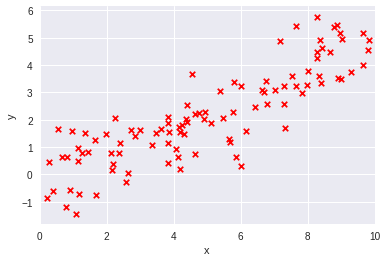

In [117]:
# Data Point 시각화 X좌표 Y좌표 
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(0,10)
plt.xlabel('x')
plt.ylabel('y');

### Define Cost Function - Mean Square Error Cost  

(Ground Truth - Predicted Value)^2

![대체 텍스트](https://raw.githubusercontent.com/ritchieng/machine-learning-stanford/master/w10_large_scale_ml/largescaleml2.png)

In [0]:
def Costfunction (X, y, theta=np.array([[0],[0]])):
    m = y.size 
    J = 0
    h = X.dot(theta) # X0*W0 + X1*W1 부분 : (100*K) x ( K*1)  ==> 100 *1 
    J = (np.sum(np.square(h-y)/(2*m))) # Cost fuction 을 설정합니다. 
    
    return(J)

In [119]:
Costfunction(X,y)

3.723654183376962

### Define Gradient Descent Algorithm 

![대체 텍스트](https://2.bp.blogspot.com/-AdV-O-MoZHE/TtLibFTaf9I/AAAAAAAAAVM/aOxUGP7zl98/s1600/gradient+descent+algorithm+OLS.png)

In [0]:
def gradientDescent(X, y, theta=np.array([[0],[0]]), alpha=0.01, num_iters=1000):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)

        error = h- y # error predict - ground Truth 
       
        theta = theta - alpha*((X.T).dot(error))/m # Gradient Descent # alpha : learnig rate dJ/dTheta ==> (h-y)x
        J_history[iter] = Costfunction(X, y, theta)
    return(theta, J_history)

theta:  [-0.38293259  0.51232044]


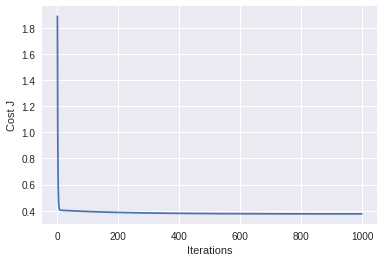

In [127]:
theta , Cost_J = gradientDescent(X, y)
print('theta: ',theta.ravel())

plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

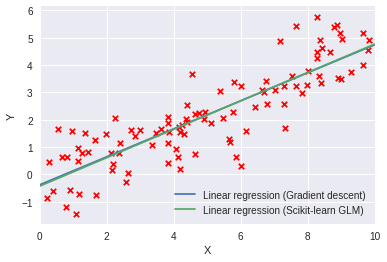

In [128]:
xx = np.arange(0,11)
yy = theta[0]+theta[1]*xx

# Plot gradient descent
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')

# Compare with Scikit-learn Linear regression 
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')

plt.xlim(0,10)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc=4);

In [129]:
 # Predict y with x of 1 and 2
print(theta.T.dot([1, 1]))
print(theta.T.dot([1, 2]))

[0.12938785]
[0.64170829]


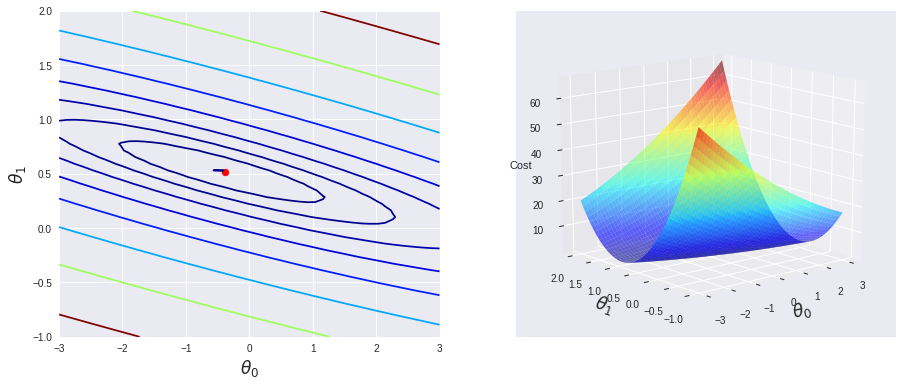

In [130]:

# Create grid coordinates for plotting# Create 
B0 = np.linspace(-3, 3, 50)
B1 = np.linspace(-1, 2, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = Costfunction(X,y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

## Y= x^2  데이터 fitting  
### y = x0*w0 + x1*w1

In [0]:
x1 =  np.random.uniform(-5,5,100)
y =  (x1**2)*0.5 + np.random.normal(0,1.5,100) -0.1 # 0.5*X**2 -0.1 + noise-term 
y = y.reshape(y.size,1)

In [0]:
X = np.c_[np.ones(x1.shape[0]),x1] # Basis function 생성 x0는 항상? -> 1 //  x1 =x 

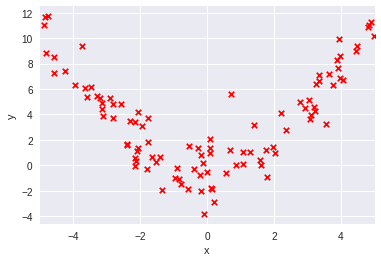

In [133]:
# Data Point 시각화 X좌표 Y좌표 
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(-5,5)
plt.xlabel('x')
plt.ylabel('y');

theta:  [3.56759179 0.16567378]


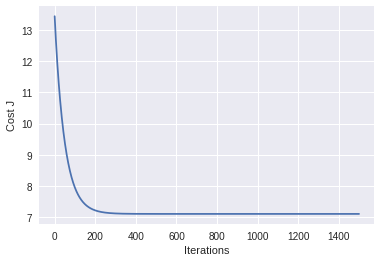

In [135]:
theta , Cost_J = gradientDescent(X, y)
print('theta: ',theta.ravel())

plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

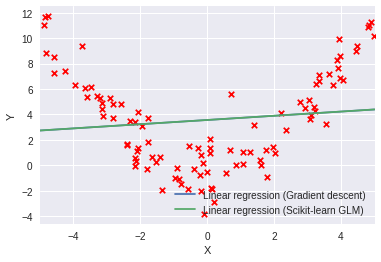

In [136]:
xx = np.arange(-5,6)
yy = theta[0]+theta[1]*xx

# Plot gradient descent
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')

# Compare with Scikit-learn Linear regression 
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')

plt.xlim(-5,5)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc=4);

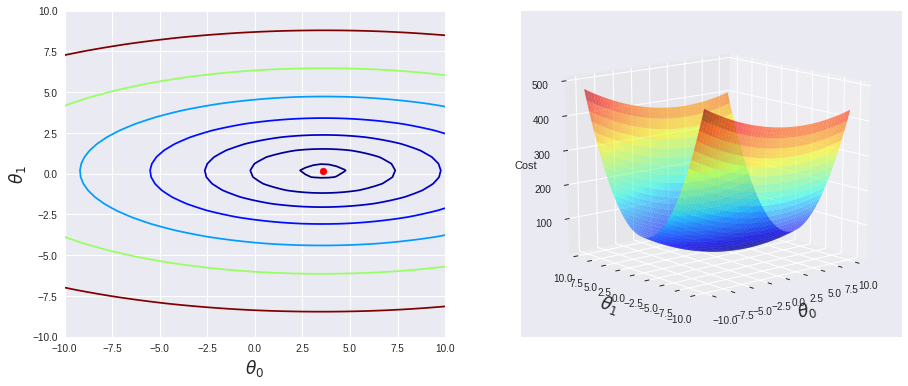

In [137]:

# Create grid coordinates for plotting# Create 
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-10, 10, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = Costfunction(X,y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

##  Mulitple Feature Linear regression 

y = W0*X0 + W1*X1+W2X2  ( X2 == X1^2)

In [0]:
X = np.c_[np.ones(x1.shape[0]),x1,x1**2] # Basis function [x0, x1 , x2] 생성  x2 = x**2 으로 

In [0]:
def gradientDescent(X, y, theta=np.array([[0],[0]]), alpha=0.01, num_iters=1000):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)

        error = h- y # error predict - ground Truth 
       
        theta = theta - alpha*((X.T).dot(error))/m # Gradient Descent # alpha : learnig rate dJ/dTheta ==> (h-y)x
        J_history[iter] = Costfunction(X, y, theta)
    return(theta, J_history)

### Gradient Descent Algorithms 정의 theta : 3x1 

theta:  [-0.14332929  0.05291761  0.47524714]


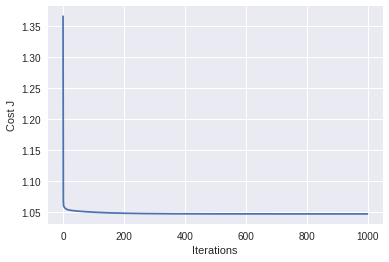

In [142]:
theta , Cost_J = gradientDescent(X, y,np.array([[0],[0],[0]]))
print('theta: ',theta.ravel())

plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

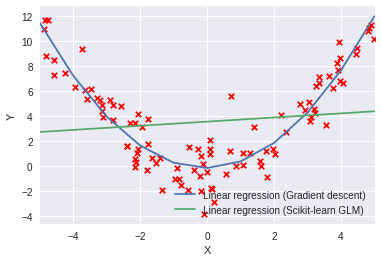

In [140]:
xx = np.arange(-5,6)
yy = theta[0]+theta[1]*xx + theta[2]*xx**2

# Plot gradient descent
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')

# Compare with Scikit-learn Linear regression 
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')

plt.xlim(-5,5)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc=4);